In [1]:
from UNet import *
import numpy as np
import matplotlib.pyplot as plt
import time
from scipy.ndimage import imread

set hyperparameters

In [12]:
batch_size = 5
img_size = 32
lr = .0002
epoch = 2



input pipeline

In [3]:
img_dir = './maps/'
img_data = dset.ImageFolder(root=img_dir, transform=transforms.Compose([
                                                    transforms.Resize(size=img_size),
                                                    transforms.CenterCrop(size=(img_size, img_size*2)),
                                                    transforms.ToTensor(),
                                                    ]))
img_batch = data.DataLoader(img_data, batch_size=batch_size, shuffle=True, num_workers=4)



In [26]:
len(img_batch)

439

In [4]:
img, la = img_data.__getitem__(0)

In [5]:
img_data.classes

['train', 'val']

In [6]:
img_data.class_to_idx

{'train': 0, 'val': 1}

In [7]:
img_data.imgs

[('./maps/train/1.jpg', 0),
 ('./maps/train/10.jpg', 0),
 ('./maps/train/100.jpg', 0),
 ('./maps/train/1000.jpg', 0),
 ('./maps/train/1001.jpg', 0),
 ('./maps/train/1002.jpg', 0),
 ('./maps/train/1003.jpg', 0),
 ('./maps/train/1004.jpg', 0),
 ('./maps/train/1005.jpg', 0),
 ('./maps/train/1006.jpg', 0),
 ('./maps/train/1007.jpg', 0),
 ('./maps/train/1008.jpg', 0),
 ('./maps/train/1009.jpg', 0),
 ('./maps/train/101.jpg', 0),
 ('./maps/train/1010.jpg', 0),
 ('./maps/train/1011.jpg', 0),
 ('./maps/train/1012.jpg', 0),
 ('./maps/train/1013.jpg', 0),
 ('./maps/train/1014.jpg', 0),
 ('./maps/train/1015.jpg', 0),
 ('./maps/train/1016.jpg', 0),
 ('./maps/train/1017.jpg', 0),
 ('./maps/train/1018.jpg', 0),
 ('./maps/train/1019.jpg', 0),
 ('./maps/train/102.jpg', 0),
 ('./maps/train/1020.jpg', 0),
 ('./maps/train/1021.jpg', 0),
 ('./maps/train/1022.jpg', 0),
 ('./maps/train/1023.jpg', 0),
 ('./maps/train/1024.jpg', 0),
 ('./maps/train/1025.jpg', 0),
 ('./maps/train/1026.jpg', 0),
 ('./maps/train/

In [8]:
len(img_data)

2194

In [9]:
img_data.labels

AttributeError: 'ImageFolder' object has no attribute 'labels'

In [10]:
trainiter = iter(img_batch)

Process Process-2:
Process Process-4:
Process Process-1:
Process Process-3:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/Users/lijin/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/Users/lijin/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/Users/lijin/anaconda3/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/lijin/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/Users/lijin/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/Users/lijin/anaconda3/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/lijin/anaconda3/lib/python3.6/site-packages/t

In [11]:
imgs, labels = trainiter.next()

In [12]:
labels


 1
 1
 0
 1
 1
[torch.LongTensor of size 5]

### data visualization

In [4]:
jpgfile = imread("./maps/train/1.jpg")

In [5]:
jpgfile.shape

(600, 1200, 3)

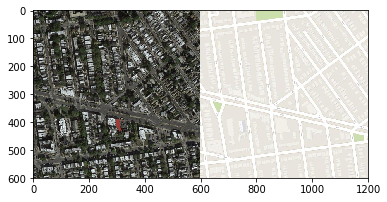

In [15]:
plt.imshow(jpgfile)
plt.show()

In [16]:
temp = np.array(img_data[0][0])

In [17]:
temp.T.shape

(64, 32, 3)

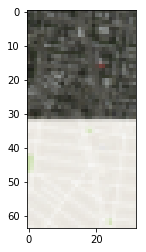

In [18]:
plt.imshow(temp.T)
plt.show()

In [19]:
img_batch


 0
 1
 0
 1
 0
[torch.LongTensor of size 5]



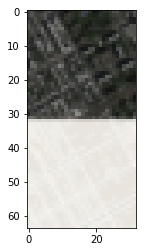


 0
 0
 0
 0
 1
[torch.LongTensor of size 5]



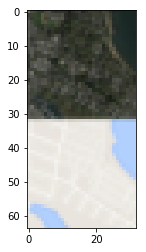


 1
 1
 1
 0
 0
[torch.LongTensor of size 5]



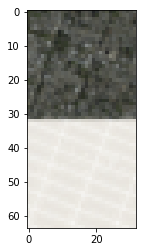


 0
 0
 1
 0
 0
[torch.LongTensor of size 5]



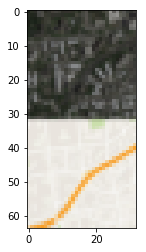


 0
 1
 1
 1
 1
[torch.LongTensor of size 5]



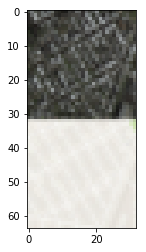


 1
 1
 0
 0
 1
[torch.LongTensor of size 5]



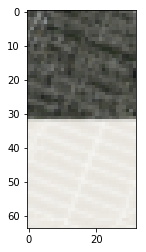

In [20]:
for i, (image, label) in enumerate(img_batch):
    plt.imshow(np.array(image[0]).T)
    print(label)
    plt.show()
    if i == 5:
        break

initiate generator

In [6]:
#generator = nn.DataParallel(UnetGenerator(3,3,64)).cuda() # utlize single or multi GPU
generator = UnetGenerator(3,3,64) # use cpu without wrapping into nn.DataParallel



------Initiating the U-Net------



load pretrained model

In [22]:
try:
    generator = torch.load('./model/unet.pkl')
    print("\n------model restored------\n")
except:
    print("\n------model not restored------\n")
    pass


------model not restored------



set loss function and optimizer

In [7]:
recon_loss_func = nn.MSELoss()
gen_optimizer = torch.optim.Adam(generator.parameters(), lr=lr)

training the model

In [7]:
#ile = open('./unet_mse_loss', 'w')

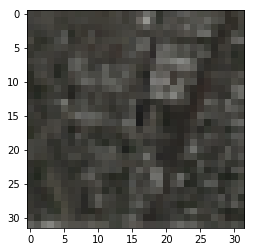

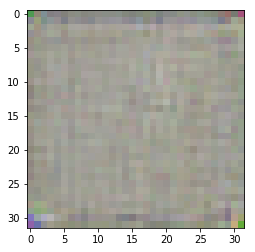

Variable containing:
1.00000e-02 *
  9.0162
[torch.FloatTensor of size 1]



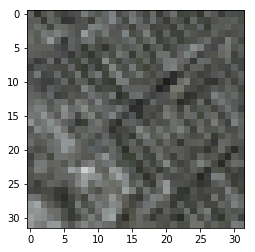

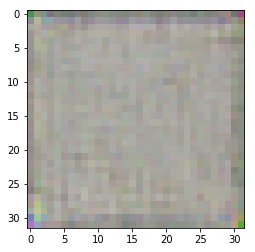

Variable containing:
1.00000e-02 *
  8.6435
[torch.FloatTensor of size 1]



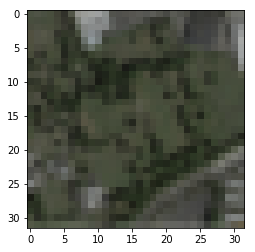

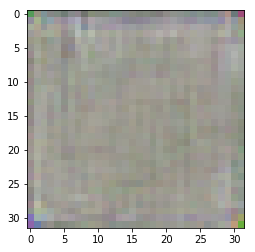

Variable containing:
1.00000e-02 *
  5.9907
[torch.FloatTensor of size 1]



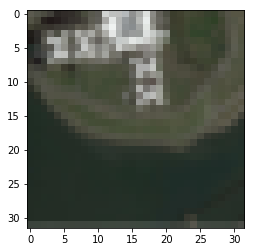

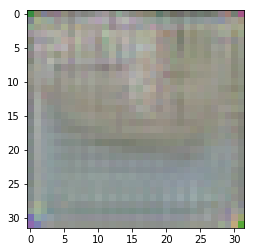

Variable containing:
1.00000e-02 *
  9.5876
[torch.FloatTensor of size 1]



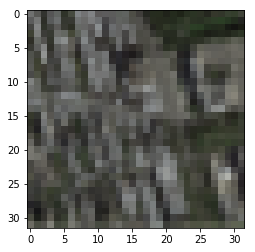

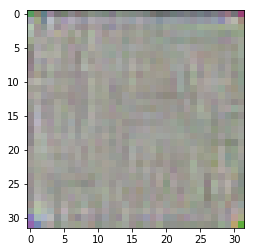

Variable containing:
1.00000e-02 *
  9.1333
[torch.FloatTensor of size 1]



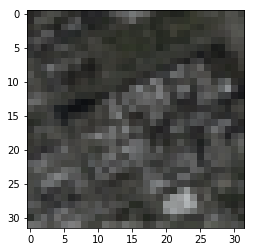

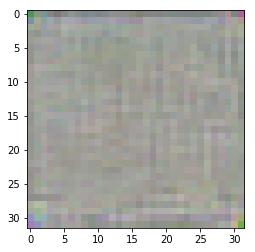

Variable containing:
1.00000e-02 *
  8.7883
[torch.FloatTensor of size 1]



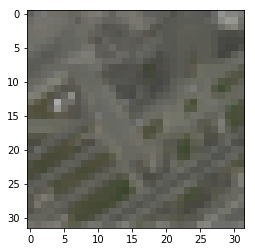

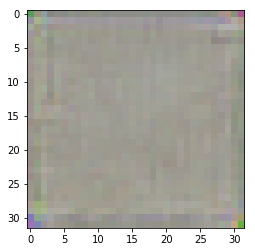

Variable containing:
1.00000e-02 *
  7.5653
[torch.FloatTensor of size 1]



Process Process-155:
Process Process-154:
Process Process-156:
Process Process-153:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/Users/lijin/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/Users/lijin/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/Users/lijin/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/Users/lijin/anaconda3/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/lijin/anaconda3/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/lijin/anaconda3/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/lijin/anaconda3/lib/python3.6/site-packages/torch

KeyboardInterrupt: 

In [20]:
start = time.time()
for i in range(epoch):
    for iter, (image, label) in enumerate(img_batch):
        satel_image, map_image = torch.chunk(image, chunks=2, dim=3)
        gen_optimizer.zero_grad()
        
        x = Variable(satel_image)#.cuda(0)
        y_ = Variable(map_image)#.cuda(0)
        y = generator.forward(x)
        temp = y.data.numpy()
        plt.imshow(satel_image.numpy()[0].T)
        plt.show()
        plt.imshow(temp[0].T)
        plt.show()
        loss = recon_loss_func(y, y_)

        loss.backward()
        gen_optimizer.step()
        print(loss)
    print("******")
    print(i)
        
 


end = time.time()
elapsed = end - start
print("time cost:", elapsed)





In [ ]:
        """
     
        """